Graph built: 196860 nodes, 869420 edges
Centrality metrics computed
             user_id  degree_centrality  betweenness_centrality  \
387  100013433947608           0.024505            2.089489e-08   
70   100047252544379           0.024317            4.326577e-08   
340  100023627930821           0.024149            1.812299e-08   
167  100064698558879           0.023646            2.678208e-08   
307  100025524373550           0.023641            7.587138e-09   
193  100012300797133           0.023448            1.221993e-08   
359  100046719821258           0.023367            3.664174e-08   
137  100010260273488           0.023316            9.548669e-09   
210  100054063093694           0.023286            2.590785e-09   
435  100065498894854           0.023240            1.370559e-08   

                name  
387          Li Heat  
70   PaidnFull Gbaby  
340         Cam Ynic  
167         An Tinya  
307            Li Jo  
193    Keion McClure  
359       Glenn King  
137       

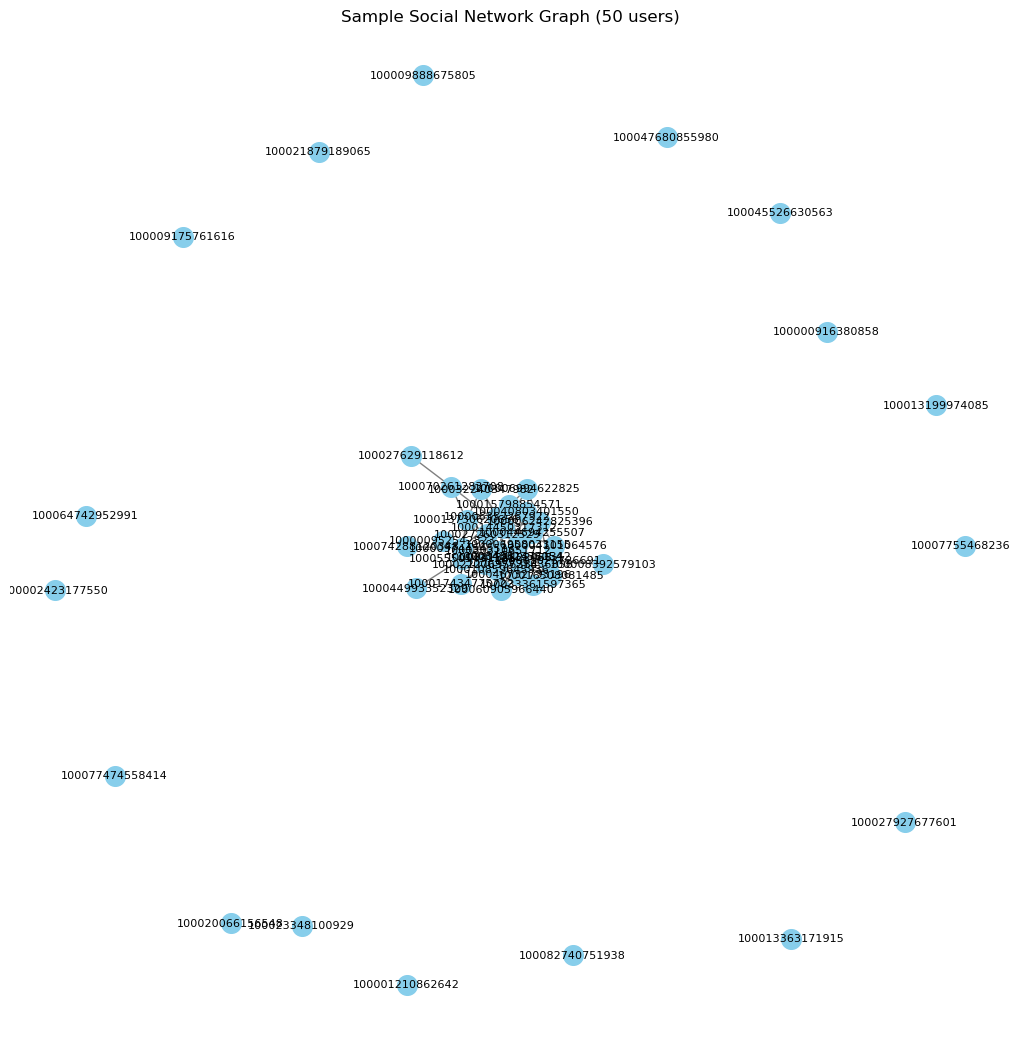

In [ ]:
# Code for Cheaha Implementation ---->
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
import networkx as nx
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
file_path = "Updated_Friends_of_Friends.xlsx"  # relative path --note -> make sure the Excel file is in the same folder as sna.ipynb
random_seed = 42  # for reproducibility
visualize_sample_size = 50  # number of top hubs to visualize 

# --- HELPER FUNCTIONS ---
def normalize_cols(df):
    """Lowercase, strip, and replace spaces in column names"""
    df = df.copy()
    df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
    return df

# --- LOAD & CLEAN DATA ---
print("Loading and cleaning data...")
users_df = pd.read_excel(file_path, sheet_name="users", dtype=str)
friends_df = pd.read_excel(file_path, sheet_name="friends", dtype=str)

# Normalize column names
users_df = normalize_cols(users_df)
friends_df = normalize_cols(friends_df)

# Clean ID columns
users_df["id"] = users_df["id"].astype(str).str.strip()
friends_df["id"] = friends_df["id"].astype(str).str.strip()
friends_df["parent_user_id"] = friends_df["parent_user_id"].astype(str).str.strip()

# Prepare user ID list
users_ids = users_df["id"].tolist()

# --- BUILD GRAPH ---
print("Building graph...")
G = nx.Graph()

# Add all nodes (users + friends)
all_nodes = set(users_ids).union(friends_df["id"]).union(friends_df["parent_user_id"])
G.add_nodes_from(all_nodes)

# Add edges between users and friends
for _, row in friends_df.iterrows():
    main_user = row["parent_user_id"]
    friend_id = row["id"]
    if main_user != friend_id:  # avoid self-loop
        G.add_edge(main_user, friend_id)

print(f"Graph built: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# --- CENTRALITY METRICS ---
print("Computing centrality metrics...")

# Degree centrality (exact)
degree_centrality = nx.degree_centrality(G)

# Betweenness centrality subset (only between users to save memory)
# NOTE: for very large networks, consider approximate methods
betweenness_centrality = nx.betweenness_centrality_subset(
    G,
    sources=users_ids,
    targets=users_ids,
    normalized=True,
)

# --- AGGREGATE RESULTS ---
metrics_df = pd.DataFrame({
    "user_id": users_ids,
    "degree_centrality": [degree_centrality.get(uid, 0) for uid in users_ids],
    "betweenness_centrality": [betweenness_centrality.get(uid, 0) for uid in users_ids]
})

# Map names for readability
name_map = {row["id"]: row["name"] for _, row in users_df.iterrows()}
metrics_df["name"] = metrics_df["user_id"].map(name_map).fillna("Unknown")

# Sort by degree centrality descending
metrics_df = metrics_df.sort_values(by="degree_centrality", ascending=False)
print("Top 10 users by degree centrality:")
print(metrics_df.head(10))

# --- SAVE RESULTS ---
metrics_df.to_csv("user_metrics_user_to_user_betweenness.csv", index=False)
print("Metrics saved to 'user_metrics_user_to_user_betweenness.csv'")

# --- HUB-FOCUSED VISUALIZATION (OPTIONAL) ---
if visualize_sample_size > 0:
    print(f"Visualizing top {visualize_sample_size} hubs...")

    # Select top N users by degree centrality
    top_users = metrics_df.head(visualize_sample_size)["user_id"].tolist()

    # Include immediate neighbors to provide context
    sample_nodes = set(top_users)
    for uid in top_users:
        sample_nodes.update(G.neighbors(uid))

    # Create subgraph for visualization
    subG = G.subgraph(sample_nodes)

    # Map IDs to names for labels
    labels = {node: name_map.get(node, node) for node in subG.nodes()}

    # Plot
    plt.figure(figsize=(12, 12))
    nx.draw(
        subG,
        with_labels=True,
        labels=labels,
        node_size=300,
        node_color="skyblue",
        edge_color="gray",
        font_size=8,
    )
    plt.title(f"Top {visualize_sample_size} hubs and their connections")
    plt.show()

file_path = "Updated_Friends_of_Friends.xlsx"  #  # relative path --note -> make sure the Excel file is in the same folder as sna.ipynb
random_seed = 42
visualize_sample_size = 50  # small sample for local visualization

# --- HELPER FUNCTIONS ---
def normalize_cols(df):
    """Lowercase, strip, and replace spaces in column names"""
    df = df.copy()
    df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
    return df

# --- LOAD & CLEAN DATA ---
print("Loading and cleaning data...")
users_df = pd.read_excel(file_path, sheet_name="users", dtype=str)
friends_df = pd.read_excel(file_path, sheet_name="friends", dtype=str)

# Normalize columns
users_df = normalize_cols(users_df)
friends_df = normalize_cols(friends_df)

# Clean ID columns
users_df["id"] = users_df["id"].astype(str).str.strip()
friends_df["id"] = friends_df["id"].astype(str).str.strip()
friends_df["parent_user_id"] = friends_df["parent_user_id"].astype(str).str.strip()

users_ids = users_df["id"].tolist()

# --- BUILD GRAPH ---
print("Building graph...")
G = nx.Graph()
# Add all nodes (users + friends)
all_nodes = set(users_ids).union(friends_df["id"]).union(friends_df["parent_user_id"])
G.add_nodes_from(all_nodes)

# Add edges
for _, row in friends_df.iterrows():
    main_user = row["parent_user_id"]
    friend_id = row["id"]
    if main_user != friend_id:
        G.add_edge(main_user, friend_id)

print(f"Graph built: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# --- CENTRALITY METRICS ---
print("Computing centrality metrics...")

# 1. Degree centrality (exact, scalable)
degree_centrality = nx.degree_centrality(G)

# 2. Betweenness centrality subset (only between user IDs to save memory)
# WARNING: for very large graphs, this may still be heavy; consider approximate methods
betweenness_centrality = nx.betweenness_centrality_subset(
    G,
    sources=users_ids,
    targets=users_ids,
    normalized=True,
)

# --- AGGREGATE RESULTS ---
metrics_df = pd.DataFrame({
    "user_id": users_ids,
    "degree_centrality": [degree_centrality.get(uid, 0) for uid in users_ids],
    "betweenness_centrality": [betweenness_centrality.get(uid, 0) for uid in users_ids]
})

# Map names
name_map = {row["id"]: row["name"] for _, row in users_df.iterrows()}
metrics_df["name"] = metrics_df["user_id"].map(name_map).fillna("Unknown")

# Sort descending
metrics_df = metrics_df.sort_values(by="degree_centrality", ascending=False)
print("Top 10 users by degree centrality:")
print(metrics_df.head(10))

# --- SAVE RESULTS ---
metrics_df.to_csv("user_metrics_user_to_user_betweenness.csv", index=False)

# --- OPTIONAL LOCAL VISUALIZATION ---
if visualize_sample_size > 0:
    plt.figure(figsize=(10, 10))
    sample_nodes = users_ids[:visualize_sample_size]
    subG = G.subgraph(sample_nodes)
    nx.draw(subG, with_labels=True, node_size=200, node_color="skyblue", edge_color="gray", font_size=8)
    plt.title(f"Social Network Subgraph: Top {visualize_sample_size} Users by Degree Centrality and Their Neighbors")
    plt.show()


In [ ]:
#Verify worksheet -- for testing purposes 
import pandas as pd

file_path = "Updated_Friends_of_Friends.xlsx"  
excel_file = pd.ExcelFile(file_path)

print("Excel file loaded successfully!")
print("Available sheet names:")
print(excel_file.sheet_names)


Excel file loaded successfully!
Available sheet names:
['users', 'friends', 'friends_intersect']


In [4]:
'Graph Dimensions: 196860 nodes, 869420 edges'

'Graph Dimensions: 196860 nodes, 869420 edges'

In [ ]:
# Verify parsing -- for testing purposes
for sheet in ["users", "friends", "friends_intersect"]:
    print(f"\n Previewing '{sheet}' sheet:")
    df = pd.read_excel("Updated_Friends_of_Friends.xlsx", sheet_name=sheet)
    print("Columns:", list(df.columns))
    print(df.head(3))  



🔍 Previewing 'users' sheet:
Columns: ['id', 'name']
                id                name
0  100040803401550       Triana Siglar
1  100027927677601      Anthony Knight
2  100000952542823  Domonique Williams

🔍 Previewing 'friends' sheet:
Columns: ['id', 'name', 'parent_user_id']
           id             name   parent_user_id
0    20506232        Neesh Cee  100040803401550
1   579600326     Eric Collins  100040803401550
2  1005090564  Miki'a S. Peavy  100040803401550

🔍 Previewing 'friends_intersect' sheet:
Columns: ['id', 'name', 'num_occurrences']
                id           name  num_occurrences
0  100010067401183   Scoop Gizzle              196
1  100012588512916  Kenyara Renee              185
2  100027905569303          Li Yo              182
